In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names= dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

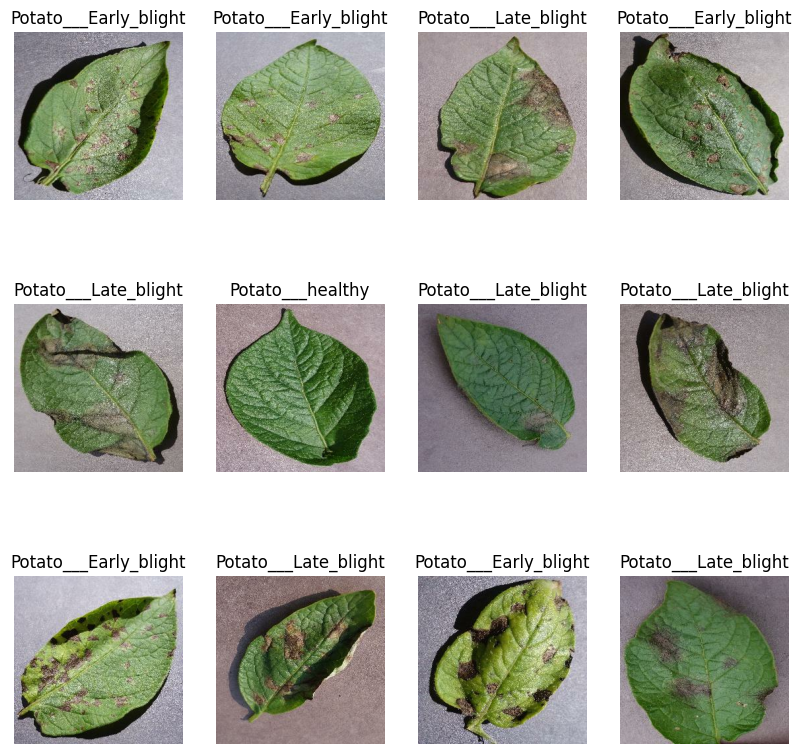

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
len(dataset)

68

In [8]:
# 80%=> training
# 20%=> 10% validation, 10% test

In [9]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split* ds_size)
    
    train_ds=ds.take(train_size)
    
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [16]:
 train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=3

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (256, 256, 3)             0         
                                                                 
 sequential_1 (Sequential)   (256, 256, 3)             0         
                                                                 
 conv2d_18 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 36s 635ms/step - loss: 0.8472 - accuracy: 0.6186 - val_loss: 0.6404 - val_accuracy: 0.7865
Epoch 2/50
54/54 [==============================] - 34s 622ms/step - loss: 0.5516 - accuracy: 0.7882 - val_loss: 0.3817 - val_accuracy: 0.8646
Epoch 3/50
54/54 [==============================] - 35s 647ms/step - loss: 0.3030 - accuracy: 0.8727 - val_loss: 0.1489 - val_accuracy: 0.9427
Epoch 4/50
54/54 [==============================] - 37s 688ms/step - loss: 0.3115 - accuracy: 0.8900 - val_loss: 0.6567 - val_accuracy: 0.7135
Epoch 5/50
54/54 [==============================] - 39s 709ms/step - loss: 0.1613 - accuracy: 0.9346 - val_loss: 0.0778 - val_accuracy: 0.9740
Epoch 6/50
54/54 [==============================] - 38s 704ms/step - loss: 0.1110 - accuracy: 0.9572 - val_loss: 0.0865 - val_accuracy: 0.9792
Epoch 7/50
54/54 [==============================] - 43s 797ms/step - loss: 0.0868 - accuracy: 0.9705 - val_loss: 0.1862 - val_accuracy: 0.9167

In [47]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 158ms/step - loss: 0.0467 - accuracy: 0.9844


In [48]:
scores

[0.04665202647447586, 0.984375]

In [37]:
history

In [38]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history.history['accuracy']

[0.6186342835426331,
 0.7881944179534912,
 0.8726851940155029,
 0.8900462985038757,
 0.9346064925193787,
 0.9571759104728699,
 0.9704861044883728,
 0.9652777910232544,
 0.9334490895271301,
 0.9710648059844971,
 0.9762731194496155,
 0.9826388955116272,
 0.9646990895271301,
 0.9756944179534912,
 0.9791666865348816,
 0.9809027910232544,
 0.9785879850387573,
 0.9878472089767456,
 0.9664351940155029,
 0.9849537014961243,
 0.9837962985038757,
 0.9861111044883728,
 0.9791666865348816,
 0.9768518805503845,
 0.9866898059844971,
 0.9855324029922485,
 0.9930555820465088,
 0.9849537014961243,
 0.9855324029922485,
 0.9803240895271301,
 0.9878472089767456,
 0.9918981194496155,
 0.9918981194496155,
 0.9936342835426331,
 0.9913194179534912,
 0.9820601940155029,
 0.9861111044883728,
 0.9756944179534912,
 0.9884259104728699,
 0.9878472089767456,
 0.9930555820465088,
 0.9785879850387573,
 0.9890046119689941,
 0.9832175970077515,
 0.9924768805503845,
 0.9947916865348816,
 0.9930555820465088,
 0.9884259104

In [42]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

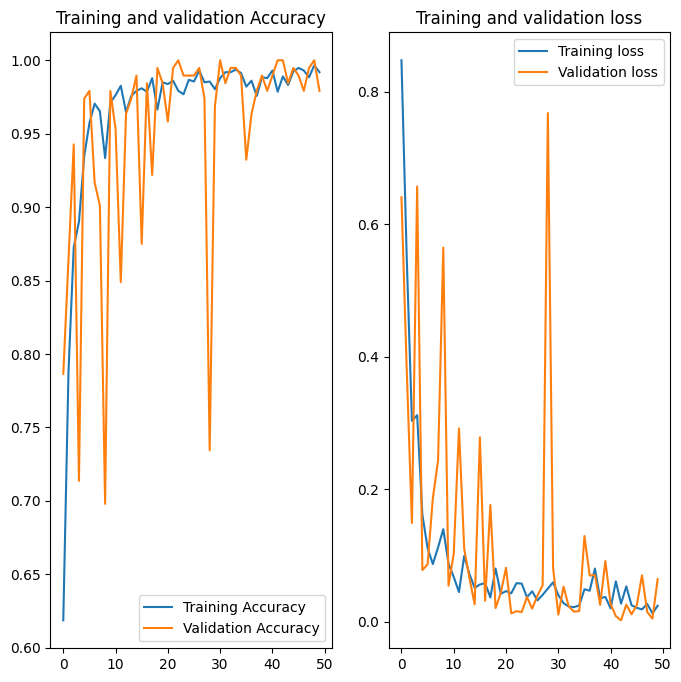

In [43]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training loss')
plt.plot(range(EPOCHS),val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.show()

In [44]:
import numpy as np

In [ ]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    
    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label:', class_names[first_label])
    
    batch_prediction=model.predict(images_batch)
    print(np.argmax(batch_prediction[0]))

First image to predict
Actual label: Potato___Late_blight
1/1 [==============================] - 0s 223ms/step
1


In [63]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) #Create a batch
    
    predictions=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 14ms/step


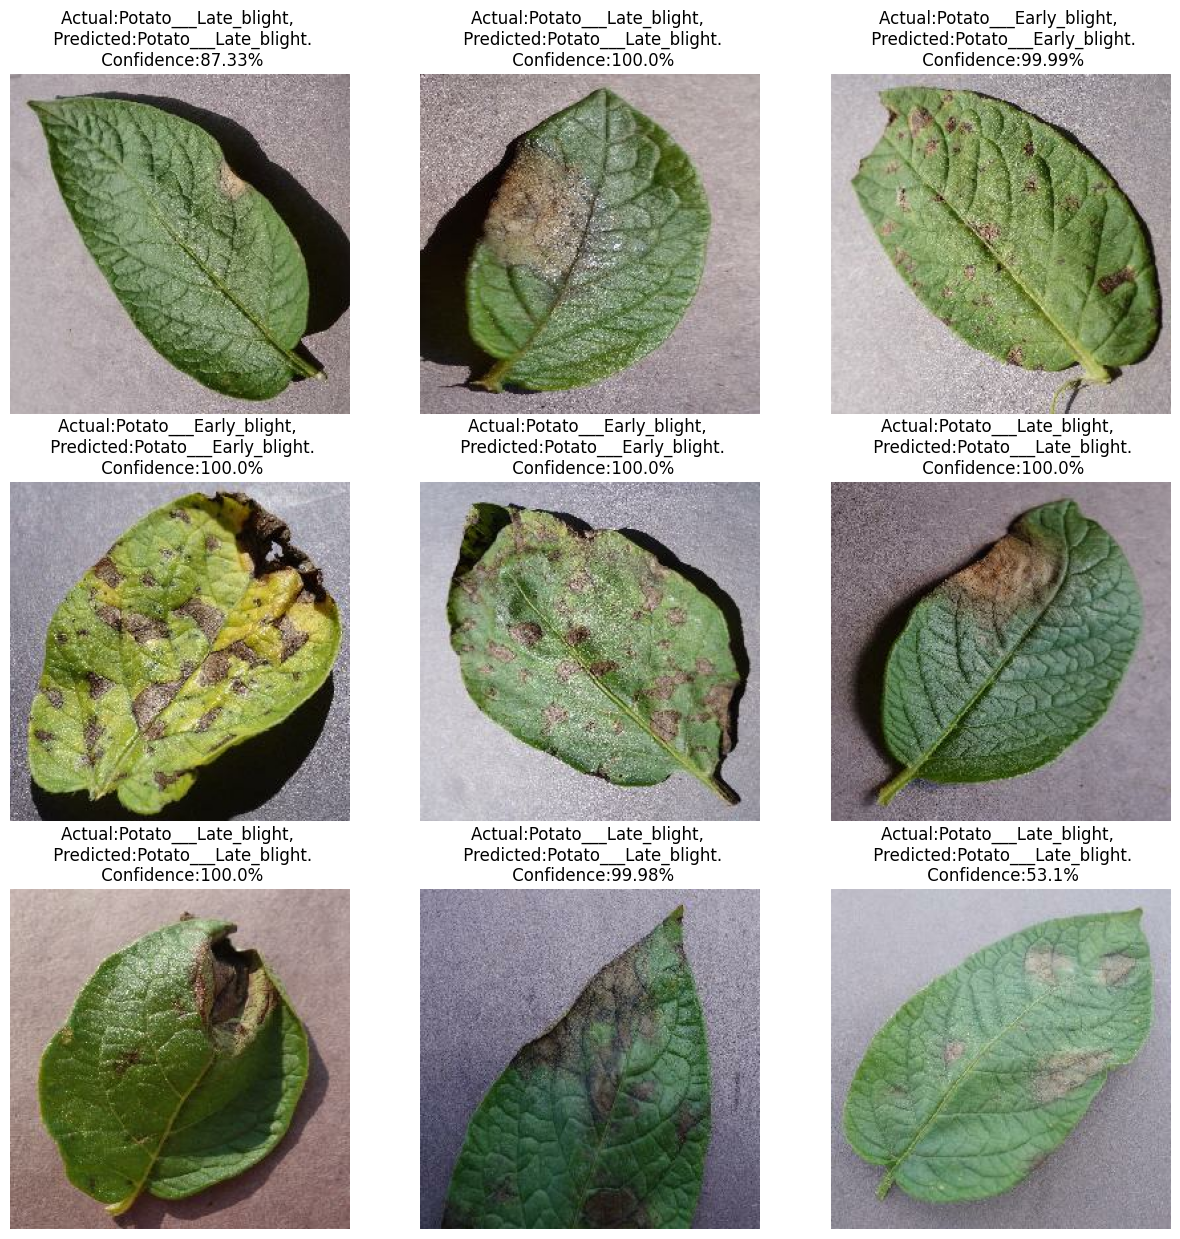

In [64]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class =class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class}, \n Predicted:{predicted_class}.\n Confidence:{confidence}%")
        plt.axis("off")

In [70]:
import os

model_files = [int(i) for i in os.listdir("../models") if i.isdigit()]
model_version = max(model_files) + 1 if model_files else 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2/assets


INFO:tensorflow:Assets written to: ../models/2/assets
